#패션 MNIST 데이터 다운

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


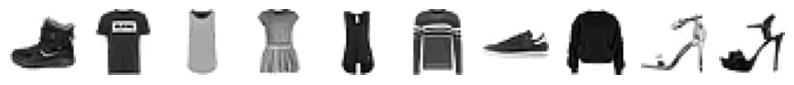

In [ ]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show() #반전된 흑백 이미지

In [ ]:
print([train_target[i] for i in range(10)]) #MNIST의 타킷은 0~9까지의 숫자 레이블로 구성

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))
#0~9개 마다 6,00개의 샘플

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
#SGDClassifier은 2차원을 다루지 못해서, 1차원 배열로
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


#0.830383333333334 max_iter = 9
#0.843699999999999 max_iter = 20
정확도가 만족스럽지 않음

In [ ]:
#텐서 플로우 불러와서 진행해보기
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled ,train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
#케라스의 Dense 클래스를 사용해 밀집층을 만듬. 필요한 매개변수는 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#10개의 패션 아이템을 분류하기 때문에, 뉴런개수를 10개로 지정. 뉴런에서 출력되는 값을 확률로 바꾸기 위해서 "소프트맥스 함수 사용"
#만약, 2개의 클래스를 분류하는 이진 분류라면 시그모이드 함수를 사용 activation = "sigmoid"
#10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 지정. -> 784개의 픽셀

In [ ]:
model = keras.Sequential(dense)

#compile 과정을 수행해야함! 손실함수 종류 설정

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

이진 분류: loss = "binary_crossentropy"
다중 분류: loss = "categorical_crossentropy"

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


#정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그냥 사용.
:정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이  바로 'sparse categorical crossentropy'

In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.6081 - accuracy: 0.7913
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4747 - accuracy: 0.8386
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4490 - accuracy: 0.8477
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4378 - accuracy: 0.8522
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4276 - accuracy: 0.8545


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.4351 - accuracy: 0.8519


[0.4351142644882202, 0.8519166707992554]

#성능을 더 높여보자

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
#dense1이 은닉충이고 100개의 뉴런을 가진 밀집층. 활성화 함수를 sigmoid로 지정, 입력의 크기를 784
dense2 = keras.layers.Dense(10, activation='softmax')
#dense2는 출력층. 10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트 맥스 함수

In [ ]:
model = keras.Sequential([dense1, dense2])#출력층은 항상 마지막!

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#sequential층 추가. dense1, dense2 처럼 만들지 않고 바로 만들기

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                       name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name="패션 MNIST 모델")

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#add방법으로 진행

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##모델 훈련

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5684 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4106 - accuracy: 0.8526
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3756 - accuracy: 0.8657
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3520 - accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3347 - accuracy: 0.8783


#Relu함수 관련 입력층 추가

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation="relu")) #relu 추가
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

#코드는 서두와 같지만, reshape과정 하지 않음.
##시그모이드보다 렐루 함수의 정확도가 좀 더 개선!

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5369 - accuracy: 0.8128
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3965 - accuracy: 0.8565
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3545 - accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3331 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3178 - accuracy: 0.8856


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.8807


[0.34205904603004456, 0.8806666731834412]

#옵티마이저

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

위의 optimizer코드는 아래와 동일

In [ ]:
#기본 코드
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categprical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) #nesterov를 사용하면 최적화(가속경사)를 사용!
#네스트로프  모멘텀은 모멘텀 최적화를 2번 반복하여 구현.

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorica_crossentropy', metrics='accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

여기에서는 Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델 훈련 진행해보기

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
#출력 결과는 RMSProp을 사용했을 때와 거의 같은 성능을 보여줌

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5222 - accuracy: 0.8170
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3942 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3521 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3235 - accuracy: 0.8817
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3064 - accuracy: 0.8859


In [ ]:
#검증세트에서 확인
model.evaluate(val_scaled, val_target)
#RMSRrop가 보다 조금 나은 성능을 냄

375/375 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8766


[0.34153249859809875, 0.8765833377838135]

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (testinput, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [ ]:
#모델 만들기
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  if a_layer: #층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


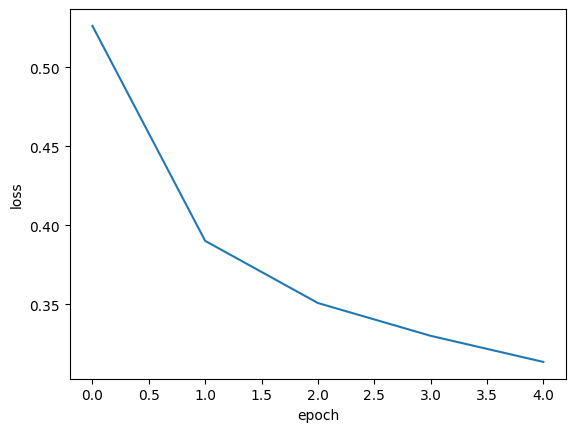

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

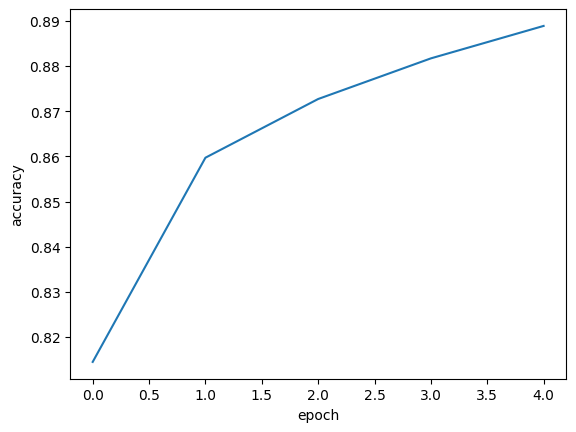

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epoch를 늘릴수록 손실이 감소됌 - > 그렇다면 반복을 늘리자 !!(과적합되기 쉬움)

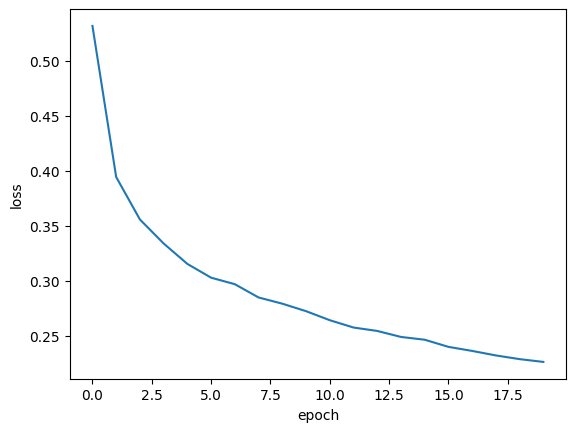

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그래서 비교

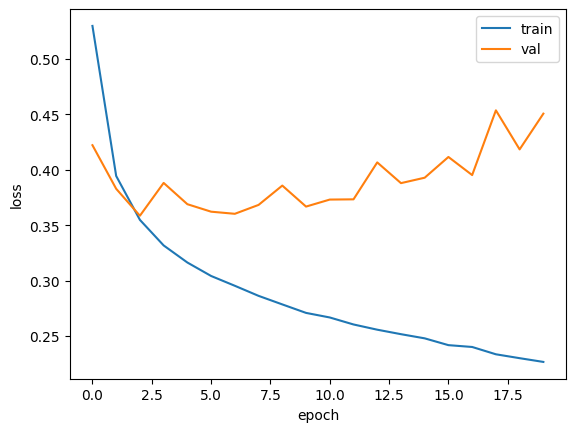

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#adam을 진행해보기

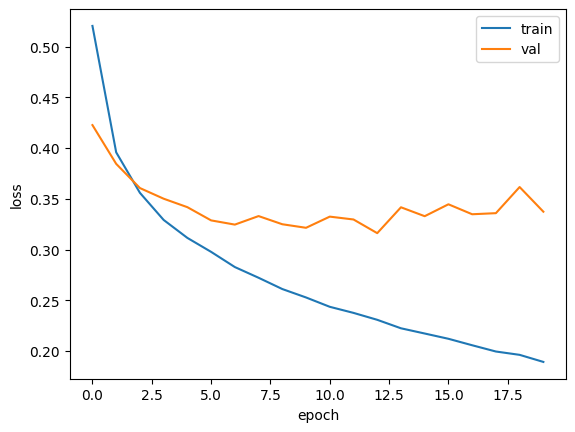

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#adam 효과 좋음!!
#신경망에서 사용하는 대표적인 규제방법!

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


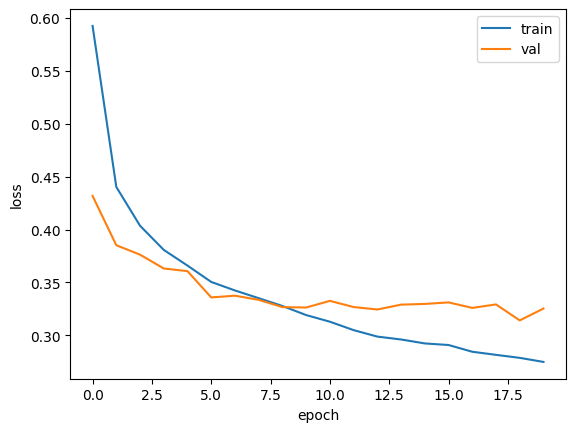

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##위에서 epoch 20으로 하니 과대적합
##아래에서는 epoch 10으로 진행

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=2, validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 - 5s - loss: 0.6003 - accuracy: 0.7877 - val_loss: 0.4572 - val_accuracy: 0.8317 - 5s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 5s - loss: 0.4477 - accuracy: 0.8401 - val_loss: 0.3997 - val_accuracy: 0.8568 - 5s/epoch - 4ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.4071 - accuracy: 0.8526 - val_loss: 0.3898 - val_accuracy: 0.8549 - 4s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.3819 - accuracy: 0.8609 - val_loss: 0.3632 - val_accuracy: 0.8662 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 5s - loss: 0.3677 - accuracy: 0.8643 - val_loss: 0.3530 - val_accuracy: 0.8725 - 5s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 7s - loss: 0.3584 - accuracy: 0.8683 - val_loss: 0.3520 - val_accuracy: 0.8700 - 7s/epoch - 5ms/step
Epoch 7/10
1500/1500 - 7s - loss: 0.3468 - accuracy: 0.8723 - val_loss: 0.3444 - val_accuracy: 0.8781 - 7s/epoch - 5ms/step
Epoch 8/10
1500/1500 - 6s - loss: 0.3384 - accuracy: 0.8752 - val_loss: 0.3542 - val_accuracy: 0.8700 - 6s/epoch - 4ms/step
Epoch 9/

In [ ]:
#훈련된 모델의 파라미터를 저장하는 간편한 save_weights 메서드 제공
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5 #공백 하이픈!

-rw-r--r-- 1 root root 333320 Nov 14 12:16 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov 14 12:16 model-whole.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

#첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5파일에서 훈련된 모델 파라미터를 읽어서 사용.
#두 번째는 아예 model-whole.h5파일에서 새로운 모델을 만들어 바로 사용

In [ ]:
#첫 번째 방법
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
#훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터 적재.
#이때 사용하는 메서드를 save_weights()와 쌍을 이루는 load_weights()메서드입니다.

In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) #argmax는 가장 큰 값 반환, ex) 첫 번째 원소가 가장 큰 값 -> 0반환
#axis = -1 배열의 마지막 차원을 따라 최대값 고름
print(np.mean(val_labels == val_target)) #같으면 1 다르면 0

375/375 [==============================] - 2s 5ms/step
0.8815


axis = 1이면 열을 따라 각 행의 최대값의 인덱스, axis=0이면 행을 따라 각 열의 최대값의 인덱스

In [ ]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3270 - accuracy: 0.8815


[0.3270123600959778, 0.8815000057220459]

#콜백! 기본적으로 에포크마다 모델을 저장. save_best_only = True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있음


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#최상의 예측값으로 예측 진행

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3181 - accuracy: 0.8831


[0.31810230016708374, 0.8830833435058594]

#EarlyStopping 콜백 제공
ex) patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지.
또한, best_weights 매개변수를 true로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
earlystopping 콜백을 modelcheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델 저장

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(early_stopping_cb.stopped_epoch) #patience를 2로 지정했으니 -1 해줘야함

9


##최상은 8번에서 멈추기

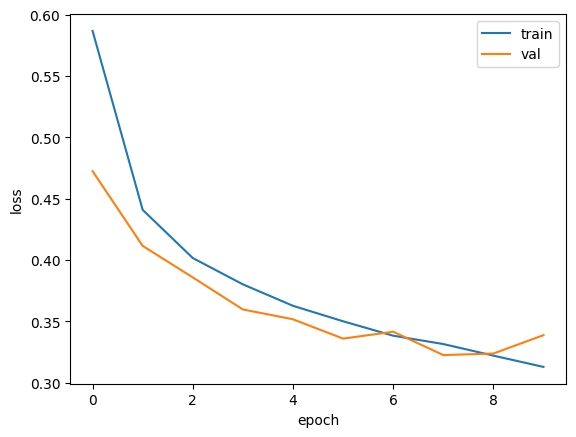

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##마지막으로 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인

In [ ]:
model.evaluate(val_scaled ,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.8817


[0.3225577473640442, 0.8817499876022339]

#최종 0.8817!